In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Using statistics helps, or even allows, to organize, summarize and visualize large amounts of data. A small data set is often used to answer questions about a much larger data set.
<br> the set of all individuals relevant to a particular statistical question - a **population**
<br> smaller group selected from a **population** - a **sample**
<br> The data in sample might be more or less similar to the data in the population. This difference can be seen as an error, and because it's the result of sampling, it's called sampling error.
<br> A metric specific to a population is called a parameter, while one specific to a sample is called a statistic. Example of two the average salary(samples) of all the employees is a parameter because it's a metric that describes the entire population

The dataset I am using in this excercise to practice the stattistics is from [Kaggle](https://www.kaggle.com/jinxbe/wnba-player-stats-2017). It is about basketball players in Women's National Basket Association. Stats from all games of season 2016-2017

- G = Games Played
- MIN = Minutes Played
- FGM = Field Goals Made
- FGA = Field Goals Attempts
- FG% = Field Goals %
- 3PM = 3Points Made
- 3PA = 3Points Attempts
- 3P% = 3Points %
- FTM = Free Throws made
- FTA = Free Throws Attempts
- FT% = Free Throws %
- OREB = Offensive Rebounds
- DREB = Defensive Rebounds
- REB = Total Rebounds
- AST = Assists
- STL = Steals
- BLK = Blocks
- TO = Turnovers
- PTS = Total points
- DD2 = Double doubles
- TD3 = Triple doubles

In [26]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [27]:
wnba = pd.read_csv('wnba.csv')
wnba.head(3)

,Name,Team,Pos,Height,Weight,BMI,Birth_Place,Birthdate,Age,College,Experience,Games Played,MIN,FGM,FGA,FG%,15:00,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TO,PTS,DD2,TD3
0,Aerial Powers,DAL,F,183,71.0,21.200991,US,"January 17, 1994",23,Michigan State,2,8,173,30,85,35.3,12,32,37.5,21,26,80.8,6,22,28,12,3,6,12,93,0,0
1,Alana Beard,LA,G/F,185,73.0,21.329438,US,"May 14, 1982",35,Duke,12,30,947,90,177,50.8,5,18,27.8,32,41,78.0,19,82,101,72,63,13,40,217,0,0
2,Alex Bentley,CON,G,170,69.0,23.875433,US,"October 27, 1990",26,Penn State,4,26,617,82,218,37.6,19,64,29.7,35,42,83.3,4,36,40,78,22,3,24,218,0,0


In [28]:
wnba.shape

(143, 32)

#### Maximum number of games played by a player in the season 2016-2017

In [29]:
max_nr_games = wnba['Games Played'].max()
max_nr_games

32

In [30]:
wnba[wnba['Games Played'] == 32]

,Name,Team,Pos,Height,Weight,BMI,Birth_Place,Birthdate,Age,College,Experience,Games Played,MIN,FGM,FGA,FG%,15:00,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TO,PTS,DD2,TD3
95,Monique Currie,PHO,G/F,183,80.0,23.888441,US,"February 25, 1983",34,Duke,11,32,717,121,284,42.6,37,93,39.8,85,103,82.5,19,103,122,67,22,11,48,364,0,0


#### Sample randomly 30 players from the population

In [31]:
wnba_sample = wnba['Games Played'].sample(30,random_state = 1)

In [32]:
wnba_sample

78     30
116    29
31     26
5      14
125    28
45     20
14      4
44     28
73     14
89     20
130    25
53     20
85     30
93     27
29     29
16     20
35      7
90      9
83     29
19     29
40     30
92     30
122    29
98     30
59     29
42     28
33     30
99     24
69     29
97     21
Name: Games Played, dtype: int64

#### Maximum number of games played from sample

In [33]:
max_nr_games_sample = wnba_sample.max()
max_nr_games_sample

30

#### Sampling error

In [34]:
sampling_error = max_nr_games - max_nr_games_sample
sampling_error

2

If we sampled to measure the mean height of adults in the US, we'd like our sample statistic (sample mean height) to get as close as possible to the population's parameter (population mean height). For this to happen, we need the individuals in our sample to form a group that is similar in structure with the group forming the population.
<br>In statistical terms, we want our samples to be representative of their corresponding populations. If a sample is representative, then the sampling error is low. The more representative a sample is, the smaller the sampling error. The less representative a sample is, the greater the sampling error.

To give every individual an equal chance of being picked, we need to sample randomly.
<br> One way to perform random sampling is to generate random numbers and use them to select a few sample units from the population. In statistics, this sampling method is called simple random sampling, and it's often abbreviated as SRS.

#### Generating an array of random numbers, and then using those numbers to select values from a Series

#### Visualize the discrepancy between a parameter and its corresponding statistics

In [35]:
def count_sample_means(sample_size):
    means_pts = []
    for i in range(100):
        sample = wnba.PTS.sample(n=sample_size, random_state=i)
        means_pts.append(sample.mean())
    return means_pts

In [36]:
sample_10 = count_sample_means(10)

In [37]:
parameter = wnba.PTS.mean()
parameter

201.7902097902098

(100, 350)

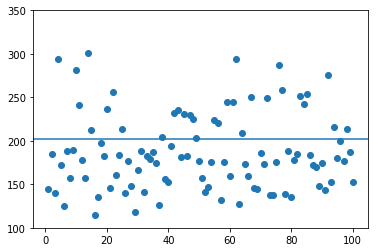

In [38]:
plt.scatter(x = range(1,101), y = sample_10)
plt.axhline(parameter)
plt.ylim(100,350)

In [39]:
min(sample_10)

115.0

In [40]:
max(sample_10)

301.4

Min sample mean of 115 points, a max - 301.4, and a population mean is 201.8, so the sampling erroris large.

Changing sample size correcting the results

(100, 350)

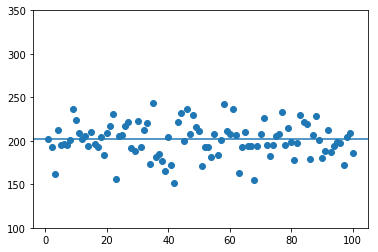

In [41]:
sample_50 = count_sample_means(50)
plt.scatter(x = range(1,101), y = sample_50)
plt.axhline(parameter)
plt.ylim(100,350)

In [42]:
min(sample_50)

151.16

In [43]:
max(sample_50)

243.2

(100, 350)

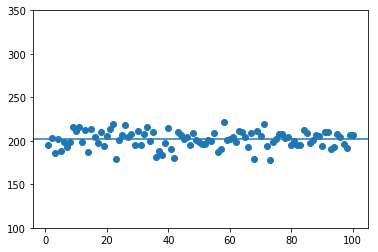

In [44]:
sample_100 = count_sample_means(100)
plt.scatter(x = range(1,101), y = sample_100)
plt.axhline(parameter)
plt.ylim(100,350)

In [45]:
min(sample_100)

178.12

In [46]:
max(sample_100)

222.05

#### Unique positions in our data set

In [47]:
wnba.Pos.unique()

array(['F', 'G/F', 'G', 'C', 'F/C'], dtype=object)

|Abbreviation|Full name|
|------------|---------|
|F|Forward|
|G|Guard|
|C|Center|
|G/F|Guard/Forward|
|F/C|Forward/Center|

#### Stratified sampling, player position

In [48]:
wnba['MGP'] = wnba.PTS/wnba['Games Played']

In [49]:
wnba.head(2)

,Name,Team,Pos,Height,Weight,BMI,Birth_Place,Birthdate,Age,College,Experience,Games Played,MIN,FGM,FGA,FG%,15:00,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TO,PTS,DD2,TD3,MGP
0,Aerial Powers,DAL,F,183,71.0,21.200991,US,"January 17, 1994",23,Michigan State,2,8,173,30,85,35.3,12,32,37.5,21,26,80.8,6,22,28,12,3,6,12,93,0,0,11.625000
1,Alana Beard,LA,G/F,185,73.0,21.329438,US,"May 14, 1982",35,Duke,12,30,947,90,177,50.8,5,18,27.8,32,41,78.0,19,82,101,72,63,13,40,217,0,0,7.233333


In [50]:
G = wnba[wnba.Pos == 'G']
F = wnba[wnba.Pos == 'F']
C = wnba[wnba.Pos == 'C']
GF = wnba[wnba.Pos == 'G/F']
FC = wnba[wnba.Pos == 'F/C']

In [51]:
points_per_position = {}
for stratum, pos in [(G,'G'), (F,'F'),(C,'C'),(GF,'GF'),(FC,'FC')]:
    samples = stratum.MGP.sample(n=10, random_state=0)
    points_per_position[pos] = samples.mean()
points_per_position    

{'G': 7.092926195632343,
 'F': 8.702175158545568,
 'C': 9.833761394334251,
 'GF': 6.817264935760487,
 'FC': 9.059118773946361}

#### Find max value for points per game/position

In [52]:
max_points = [(value, key) for key, value in points_per_position.items()]
max(max_points)[1]

'C'

In [53]:
max(points_per_position, key=points_per_position.get)

'C'

In [54]:
wnba['Games Played'].min()

2

In [55]:
wnba['Games Played'].max()

32

#### Number of matches played - in sampling context

In [56]:
wnba['Games Played'].value_counts(bins = 3, normalize = True) * 100

(22.0, 32.0]     72.727273
(12.0, 22.0]     18.181818
(1.969, 12.0]     9.090909
Name: Games Played, dtype: float64

In [57]:
wnba['Games Played'].value_counts(bins = 3) * 100

(22.0, 32.0]     10400
(12.0, 22.0]      2600
(1.969, 12.0]     1300
Name: Games Played, dtype: int64

(array([ 4.,  4.,  4.,  1.,  8.,  6., 12., 19., 24., 61.]),
 array([ 2.,  5.,  8., 11., 14., 17., 20., 23., 26., 29., 32.]),
 <a list of 10 Patch objects>)

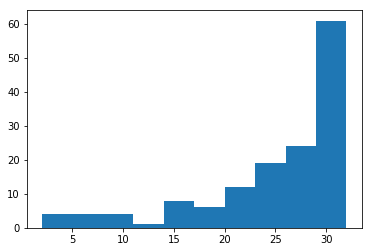

In [58]:
plt.hist(wnba['Games Played'])

(array([ 12.,  21., 110.]),
 array([ 2., 12., 22., 32.]),
 <a list of 3 Patch objects>)

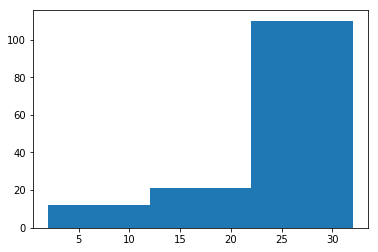

In [59]:
plt.hist(wnba['Games Played'], bins=3)

- A sample where only 2% of the players played more than 23 games - will result in a sample mean which underestimates the population mean
- A sample where more than 95% of the players had 23 games in the 2016-2017 season - will result in overestimating the population mean

#### Sample strata proportionally

##### by Games Played

In [60]:
games_less_12 = wnba[wnba['Games Played'] <= 12]
games_12_to_22 = wnba[(wnba['Games Played'] > 12) & (wnba['Games Played'] <= 22)]
games_more_22 = wnba[wnba['Games Played'] > 22]

In [61]:
sampling_means = []

for i in range(100):
    sample_less_12 = games_less_12.sample(1, random_state=i)
    sample_12_to_22 = games_12_to_22.sample(2, random_state=i)
    sample_more_22 = games_more_22.sample(7, random_state=i)
    
    sample = pd.concat([sample_less_12, sample_12_to_22, sample_more_22])
    mean_sample = sample.PTS.mean()
    sampling_means.append(mean_sample)

(100, 350)

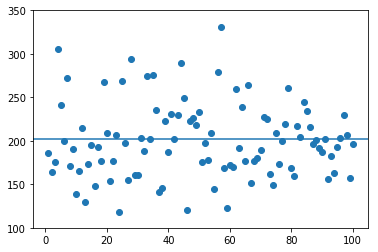

In [62]:
plt.scatter(x=range(1,101), y=sampling_means)
plt.axhline(parameter)
plt.ylim(100,350)

Final results of proportional sampling isn't too good. It looks like random sampling.

It makes more sense to stratify the data by number of minutes played, rather than by number of games played. The minutes played are a much better indicator of how much a player scored in a season than the number of games played.

##### by minutes

In [63]:
wnba.MIN.value_counts(bins = 3, normalize = True) * 100

(347.333, 682.667]    34.965035
(10.993, 347.333]     33.566434
(682.667, 1018.0]     31.468531
Name: MIN, dtype: float64

(array([48., 50., 45.]),
 array([  12.        ,  347.33333333,  682.66666667, 1018.        ]),
 <a list of 3 Patch objects>)

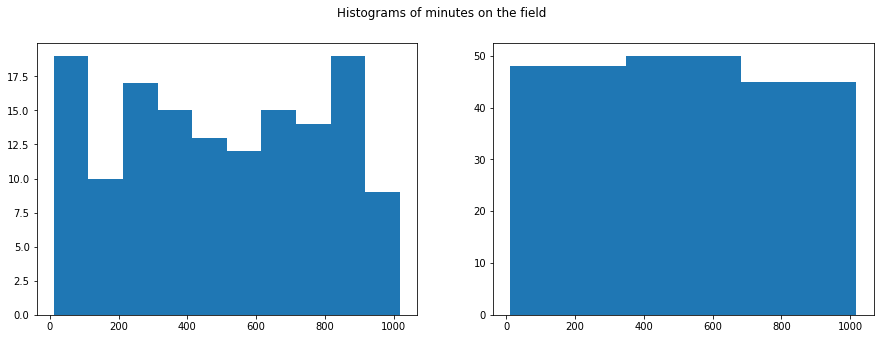

In [64]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
fig.suptitle('Histograms of minutes on the field')
ax1.hist(wnba.MIN)
ax2.hist(wnba.MIN, bins=3)

In [65]:
games_less_350 = wnba[wnba.MIN <= 350]
games_350_680 = wnba[(wnba.MIN > 350) & (wnba.MIN <= 680)]
games_more_680 = wnba[wnba.MIN > 680]

In [66]:
sampling_min_means = []

for i in range(100):
    sample_less_350 = games_less_350.sample(5, random_state=i)
    sample_350_680 = games_350_680.sample(5, random_state=i)
    sample_more_680 = games_more_680.sample(5, random_state=i)
    
    sample = pd.concat([sample_less_350, sample_350_680, sample_more_680])
    mean_sample = sample.PTS.mean()
    sampling_min_means.append(mean_sample)

(100, 350)

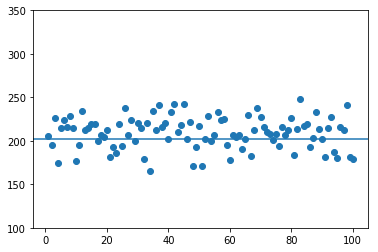

In [67]:
plt.scatter(x=range(1,101), y=sampling_min_means)
plt.axhline(parameter)
plt.ylim(100,350)

The results are much better. As a basic parameter to distribute I chose minutes and I took 15 samples(5 for each range) to calculate every mean, spread between the highest and the lowest mean is less than 100 points - compared to the previous it is better by 150 points because the difference was about 250 points.

#### Cluster sampling

In [68]:
wnba['Team'].unique()

array(['DAL', 'LA', 'CON', 'SAN', 'MIN', 'SEA', 'PHO', 'CHI', 'WAS', 'NY',
       'ATL', 'IND'], dtype=object)

pick randomly a few clusters(avoid picking cluster twice)

In [69]:
random_team = pd.Series(wnba['Team'].unique()).sample(4, random_state = 0).reset_index(drop=True)
random_team

0    PHO
1    IND
2    MIN
3    ATL
dtype: object

In [70]:
teams_samples = pd.DataFrame()

for team in random_team:
    data = wnba[wnba.Team == team]
    teams_samples = teams_samples.append(data)

In [71]:
teams_samples_height = teams_samples.Height.mean()
teams_samples_age = teams_samples.Age.mean()
teams_samples_BMI = teams_samples.BMI.mean()
teams_samples_PTS = teams_samples.PTS.mean()

In [72]:
wnba_samples_height = wnba.Height.mean()
wnba_samples_age = wnba.Age.mean()
wnba_samples_BMI = wnba.BMI.mean()
wnba_samples_PTS = wnba.PTS.mean()

In [73]:
sampling_error_height = wnba_samples_height - teams_samples_height
sampling_error_age = wnba_samples_age - teams_samples_age
sampling_error_BMI = wnba_samples_BMI - teams_samples_BMI
sampling_error_points = wnba_samples_PTS - teams_samples_PTS

In [74]:
sampling_error_height

-0.06400121617511445